## Pattern Classification using Gramian Angular Field and CNN
> Author : Manas Baviskar TY_ETA_40

In [1]:
import fastai 
from fastai.callback import *
from fastbook import *
from fastai.vision.data import ImageDataLoaders
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
import pandas as pd
import numpy as np
import os.path
import datetime
import yfinance as yf
from pathlib import Path

c:\Users\MANAS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\MANAS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\MANAS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
start1=datetime.date(2000,1,2)
end1=datetime.date(2019,11,15)
data = yf.download('MSFT',start=start1,end=end1)
df= data.copy()

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,58.68750,59.3125,56.00000,58.28125,36.632969,53228400
2000-01-04,56.78125,58.5625,56.12500,56.31250,35.395500,54119000
2000-01-05,55.56250,58.1875,54.68750,56.90625,35.768711,64059600
2000-01-06,56.09375,56.9375,54.18750,55.00000,34.570526,54976600
2000-01-07,54.31250,56.1250,53.65625,55.71875,35.022293,62013600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2000-01-03 to 2019-11-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5000 non-null   float64
 1   High       5000 non-null   float64
 2   Low        5000 non-null   float64
 3   Close      5000 non-null   float64
 4   Adj Close  5000 non-null   float64
 5   Volume     5000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 273.4 KB


In [ ]:
n_samples, n_timestamps = 1000, 50
valid_days, valid_samples = 500, n_samples // 5
startIdx_train = np.random.randint(0, len(df) - n_timestamps - valid_days, n_samples)
df_train = []
for x in startIdx_train:
    a = df.Close[x: x + n_timestamps].to_numpy()
    df_train.append(a)
df_train = np.array(df_train)
startIdx_valid = np.random.randint(len(df) - n_timestamps - valid_days, len(df) - n_timestamps , valid_samples)
df_valid = []
for x in startIdx_valid:
    a = df.Close[x: x + n_timestamps].to_numpy()
    df_valid.append(a)
df_valid = np.array(df_valid)


In [ ]:
gasf = GramianAngularField(image_size=50, method='summation')
X_gasf_train = gasf.fit_transform(df_train)

In [ ]:
def getMvmt(start, end):
    if end > start:
        return "up"
    return "down"
cmap = 'rainbow'

for i in range(0,len(df_train)):
    direction = getMvmt(df.Close[startIdx_train[i] + 49], df.Close[startIdx_train[i] + 50])
    plt.figure(figsize=(8, 8))
    plt.imshow(X_gasf_train[i], cmap=cmap, origin='lower')
    plt.axis('off')
    plt.savefig('C:\\Users\\MANAS\\Desktop\\MANAS\\TY\\SD-ED\\sem II\\data\\train\\'+ direction +"\\img"+ str(i), transparent=True, bbox_inches='tight')
    plt.close()

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


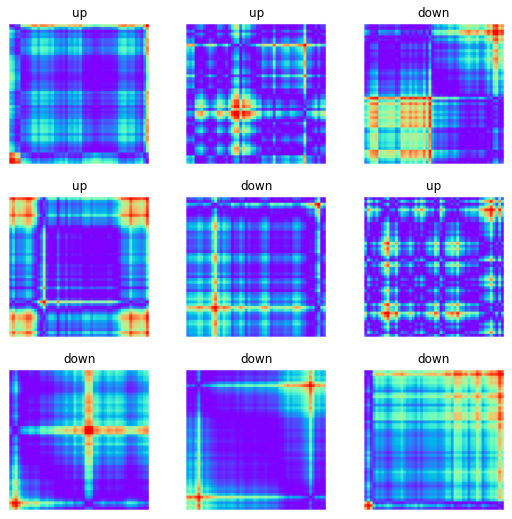

In [8]:
path = Path('C:\\Users\\MANAS\\Desktop\\MANAS\\TY\\SD-ED\\sem II\\data\\train')
dls = ImageDataLoaders.from_folder(path, get_image_files(path), valid_pct=0.2, size=224, number_workers=4, bs=32,  batch_tfms=Normalize.from_stats(*imagenet_stats))
dls.show_batch()

In [9]:
vocab = dls.vocab
vocab

['down', 'up']

In [10]:
learn = vision_learner(dls, resnet50, metrics=accuracy)

In [11]:
learn.fit_one_cycle(4)
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(2, max_lr=slice(1e-6,3e-5))

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:76] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1594884096 bytes.